In [ ]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=c62029bd45e756febed13fd93a90110b0a452a6593ced0dde316a9234276c00e
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


**HIDDEN MARKOV MODELS**

IMPORTS

In [ ]:
import pandas as pd
import numpy as np

from pyhhmm.gaussian import GaussianHMM
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt

DATA EXTRACTION

In [ ]:
start_date = "2018-01-1"
end_date = "2023-01-1"
symbol = "SPY"
data = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Adj Close", "Volume"]]

In [ ]:
# Add Returns and Range
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2018-01-03,268.959991,270.640015,268.959991,248.327530,90070400.0,0.006325,0.006246
2018-01-04,271.200012,272.160004,270.540009,249.374146,80636400.0,0.004215,0.005988
2018-01-05,272.510010,273.559998,271.950012,251.035950,83524000.0,0.006664,0.005920
2018-01-08,273.309998,274.100006,272.980011,251.495010,57319200.0,0.001829,0.004103
2018-01-09,274.399994,275.250000,274.079987,252.064316,57254000.0,0.002264,0.004269


In [ ]:
# Structure Data
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2018-01-03,0.006325,0.006246
2018-01-04,0.004215,0.005988
2018-01-05,0.006664,0.005920
2018-01-08,0.001829,0.004103
2018-01-09,0.002264,0.004269


HMM LEARNING

In [ ]:
# Train Model
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x7f96e0dbbd00>, 8296.33175474678)

In [ ]:
# Check Results
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:40])
len(hidden_states)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 3 2 2 3 0 0 0 0 0 0 2 0 0 0
 2 2 2]


1258

Regime state means for each feature

In [ ]:
model.means

array([[ 0.00348353,  0.00892804],
       [ 0.00254817,  0.01008   ],
       [-0.00982137,  0.02183638],
       [ 0.0216714 ,  0.0308042 ]])

In [ ]:
model.covars

array([[[ 5.67743479e-05,  2.75865074e-05],
        [ 2.75865074e-05,  3.45478950e-05]],

       [[ 1.11544195e-04,  6.60794936e-05],
        [ 6.60794936e-05,  7.87427828e-05]],

       [[ 3.00256492e-04, -7.35289216e-05],
        [-7.35289216e-05,  1.63670432e-04]],

       [[ 7.16573875e-04,  4.95423459e-04],
        [ 4.95423459e-04,  5.53354678e-04]]])

DATA VISUALISATION

In [ ]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct number of rows:  True


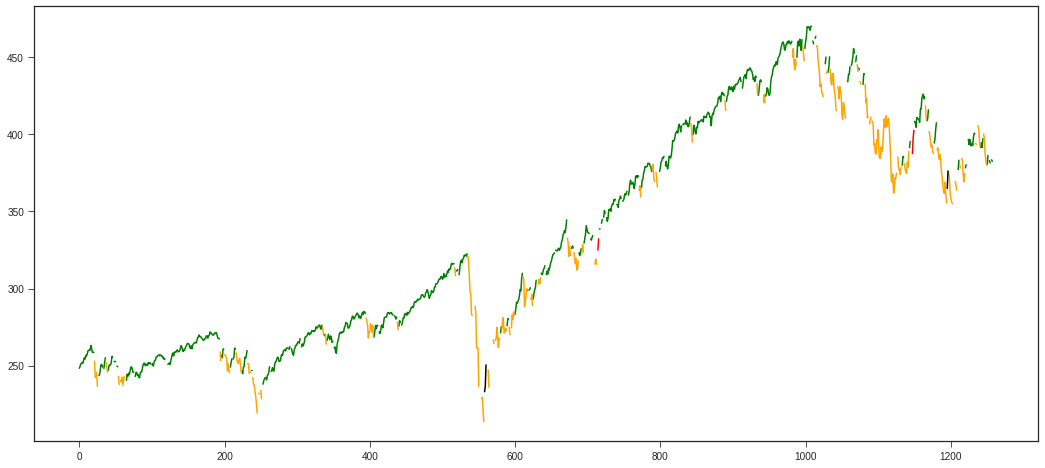

In [ ]:
# Plot Chart
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()

In [ ]:
# Add Moving Average
df["MA_12"] = df["Adj Close"].rolling(window=12).mean()
df["MA_21"] = df["Adj Close"].rolling(window=21).mean()

In [ ]:
# Structure Data
X_train = df[["Returns", "Range"]].iloc[:500]
X_test = df[["Returns", "Range"]].iloc[500:]
save_df = df.iloc[500:]

print("Train Length: ", len(X_train))
print("Test Length: ", len(X_test))
print("X_train From: ", X_train.head(1).index.item())
print("X_train To: ", X_train.tail(1).index.item())
print("X_test From: ", X_test.head(1).index.item())
print("X_test To: ", X_test.tail(1).index.item())

Train Length:  500
Test Length:  758
X_train From:  2018-01-03 00:00:00
X_train To:  2019-12-27 00:00:00
X_test From:  2019-12-30 00:00:00
X_test To:  2022-12-30 00:00:00


TRAIN HMM

In [ ]:
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])
model.predict([X_train.values])[0][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Make Prediction on Test Data

In [ ]:
df_main = save_df.copy()
df_main.drop(columns=["High", "Low"], inplace=True)

hmm_results = model.predict([X_test.values])[0]
df_main["HMM"] = hmm_results
df_main.head()

,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,
2019-12-30,322.950012,306.081970,49729100.0,-0.005513,0.007955,304.631828,301.266947,0
2019-12-31,320.529999,306.825470,57077300.0,0.002429,0.006185,305.130829,301.679480,0
2020-01-02,323.540009,309.694916,59151200.0,0.009352,0.007317,305.853938,302.349264,0
2020-01-03,321.160004,307.349823,77709700.0,-0.007572,0.007910,306.209287,303.001789,0
2020-01-06,320.489990,308.522400,55653900.0,0.003815,0.010519,306.656817,303.623868,0


BACK TESTING

In [ ]:
# Add MA Signals
df_main.loc[df_main["MA_12"] > df_main["MA_21"], "MA_Signal"] = 1
df_main.loc[df_main["MA_12"] <= df_main["MA_21"], "MA_Signal"] = 0

In [ ]:
# Add HMM Signals
favourable_states = [0, 1]
hmm_values = df_main["HMM"].values
hmm_values = [1 if x in favourable_states else 0 for x in hmm_values]
df_main["HMM_Signal"] = hmm_values

In [ ]:
# Add Combined Signal
df_main["Main_Signal"] = 0
df_main.loc[(df_main["MA_Signal"] == 1) & (df_main["HMM_Signal"] == 1), "Main_Signal"] = 1
df_main["Main_Signal"] = df_main["Main_Signal"].shift(1)

In [ ]:
# Benchmark Returns
df_main["lrets_bench"] = np.log(df_main["Adj Close"] / df_main["Adj Close"].shift(1))
df_main["bench_prod"] = df_main["lrets_bench"].cumsum()
df_main["bench_prod_exp"] = np.exp(df_main["bench_prod"]) - 1

In [ ]:
# Strategy Returns
df_main["lrets_strat"] = np.log(df_main["Open"].shift(-1) / df_main["Open"]) * df_main["Main_Signal"]
df_main["lrets_prod"] = df_main["lrets_strat"].cumsum()
df_main["strat_prod_exp"] = np.exp(df_main["lrets_prod"]) - 1

In [ ]:
df_main.dropna(inplace=True)
df_main.tail()

,Open,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_Signal,HMM_Signal,Main_Signal,lrets_bench,bench_prod,bench_prod_exp,lrets_strat,lrets_prod,strat_prod_exp
Date,,,,,,,,,,,,,,,,,
2022-12-22,383.049988,380.720001,100120900.0,-0.014266,0.030525,389.228022,393.595667,1,0.0,1,0.0,-0.014369,0.218211,0.243850,-0.0,-0.054588,-0.053124
2022-12-23,379.649994,382.910004,59857300.0,0.005752,0.013306,388.523618,392.754213,0,0.0,1,0.0,0.005736,0.223947,0.251005,0.0,-0.054588,-0.053124
2022-12-27,382.790009,381.399994,51638200.0,-0.003944,0.009219,387.437887,391.845120,0,0.0,1,0.0,-0.003951,0.219996,0.246071,-0.0,-0.054588,-0.053124
2022-12-28,381.329987,376.660004,70911500.0,-0.012428,0.018517,386.202695,391.014631,1,0.0,1,0.0,-0.012506,0.207490,0.230585,-0.0,-0.054588,-0.053124
2022-12-29,379.630005,383.440002,66970900.0,0.018000,0.013902,385.062162,390.539231,0,0.0,1,0.0,0.017840,0.225330,0.252736,0.0,-0.054588,-0.053124


METRICS CALCULATION

Sharp ratio function

In [ ]:
def sharpe_ratio(returns_series):
    N = 255
    NSQRT = np.sqrt(N)
    rf = 0.01
    mean = returns_series.mean() * N
    sigma = returns_series.std() * NSQRT
    sharpe_ratio = round((mean - rf) / sigma, 2)
    return sharpe_ratio

In [ ]:
bench_rets = round(df_main["bench_prod_exp"].values[-1] * 100, 1)
strat_rets = round(df_main["strat_prod_exp"].values[-1] * 100, 1)

bench_sharpe = sharpe_ratio(df_main["lrets_bench"].values)
strat_sharpe = sharpe_ratio(df_main["lrets_strat"].values)

In [ ]:
print(f"Returns Benchmark: {bench_rets}%")
print(f"Returns Strategy: {strat_rets}%")
print("---- ---- ---- ---- ---- ----")
print(f"Sharpe Benchmark: {bench_sharpe}")
print(f"Sharpe Strategy: {strat_sharpe}")

Returns Benchmark: 25.3%
Returns Strategy: -5.3%
---- ---- ---- ---- ---- ----
Sharpe Benchmark: 0.26
Sharpe Strategy: -0.19


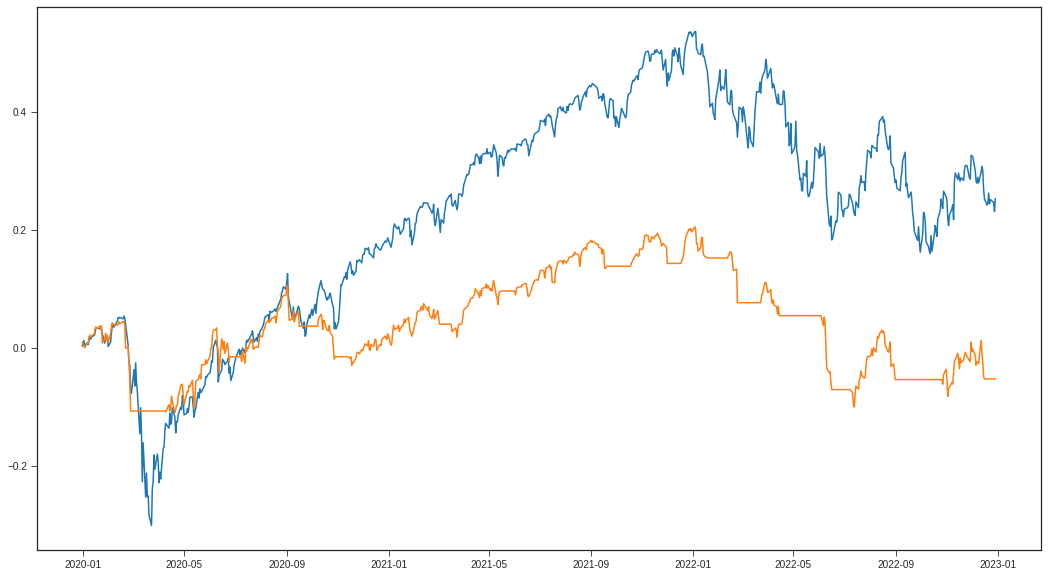

In [ ]:
fig = plt.figure(figsize = (18, 10))
plt.plot(df_main["bench_prod_exp"])
plt.plot(df_main["strat_prod_exp"])
plt.show()

**K MEANS CLUSTERING - PAIRS TRADING**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from kneed import KneeLocator

from statsmodels.tsa.stattools import coint # Cointegration and Statistics
import statsmodels.api as sm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [ ]:
start_date = "2017-01-01"
end_date = "2022-06-01"
file_name = "raw_data_etf.csv"
file_name_coint = "raw_data_coint_pairs.csv"
load_existing = True
load_coint_pairs = True

In [ ]:
if not load_existing:
    symbols = get_nasdaq_symbols()
    symbols = symbols[(symbols["ETF"] == True) & (symbols["Market Category"] == "G")] # G = NASDAQ GLOBAL MARKET
    symbols = list(symbols.index.values)
    data = DataReader(name=symbols, data_source='yahoo', start=start_date, end=end_date)["Adj Close"]
    data.to_csv(file_name)

Remove features with NaN's

In [ ]:
data = pd.read_csv(file_name)
data.dropna(axis=1, inplace=True)
data = data.set_index("Date")
print("Shape: ", data.shape)
print("Null Values: ", data.isnull().values.any())
data.head()

Shape:  (1363, 265)
Null Values:  False


,AADR,AAXJ,ACWI,ACWX,ADRE,AGNG,AGZD,AIA,AIRR,ALTY,...,VTHR,VTIP,VTWG,VTWO,VTWV,VWOB,VXUS,VYMI,WOOD,XT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,39.404003,50.324165,53.491852,34.928574,29.558573,14.668802,42.505810,42.452053,23.538317,9.600211,...,96.048004,45.296101,108.774231,51.274086,96.194260,63.629200,40.811722,48.171516,49.646027,25.511465
2017-01-04,40.082230,50.823139,53.949348,35.316765,29.874083,14.668802,42.602840,42.678879,23.885475,9.735156,...,97.151901,45.314533,111.057976,52.043102,97.649651,63.882755,41.262142,48.659973,50.088799,25.843027
2017-01-05,40.512093,51.539852,54.155670,35.618690,30.514109,14.668802,42.594006,43.205097,23.479965,9.807764,...,96.975655,45.369812,110.202805,51.524136,96.333328,64.291672,41.571251,49.131573,50.051899,25.928291
2017-01-06,40.378361,51.285820,54.164646,35.472038,30.081415,14.668802,42.558708,43.023640,23.479965,9.902229,...,97.226128,45.296101,109.639153,51.307114,95.814209,64.111755,41.482937,48.870510,50.051899,25.975655
2017-01-09,40.521645,51.331188,54.039059,35.420284,30.333826,14.668802,42.452873,43.141598,22.985437,9.838611,...,96.892189,45.323746,109.571121,50.962708,94.655472,64.275322,41.403458,48.735756,49.729046,26.039127


In [ ]:
#Feature engineering

df_returns = pd.DataFrame(data.pct_change().mean() * 255, columns=["Returns"])
df_returns["Volatility"] = data.pct_change().std() * np.sqrt(255)
scaler = StandardScaler()
scaler = scaler.fit_transform(df_returns)
scaled_data = pd.DataFrame(scaler, columns=df_returns.columns, index=df_returns.index)
df_scaled = scaled_data
df_scaled.head()

,Returns,Volatility
AADR,0.014753,0.311722
AAXJ,-0.038123,0.090672
ACWI,0.332246,-0.187269
ACWX,-0.143712,-0.198211
ADRE,-0.003167,0.417291


K-means clustering

In [ ]:
# Find the optimum number of clusters
X = df_scaled.copy()
K = range(1, 15)
distortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
c = kl.elbow
print("Optimum Clusters: ", c)

Optimum Clusters:  4


In [ ]:
# Fit K-Means Model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(df_scaled)

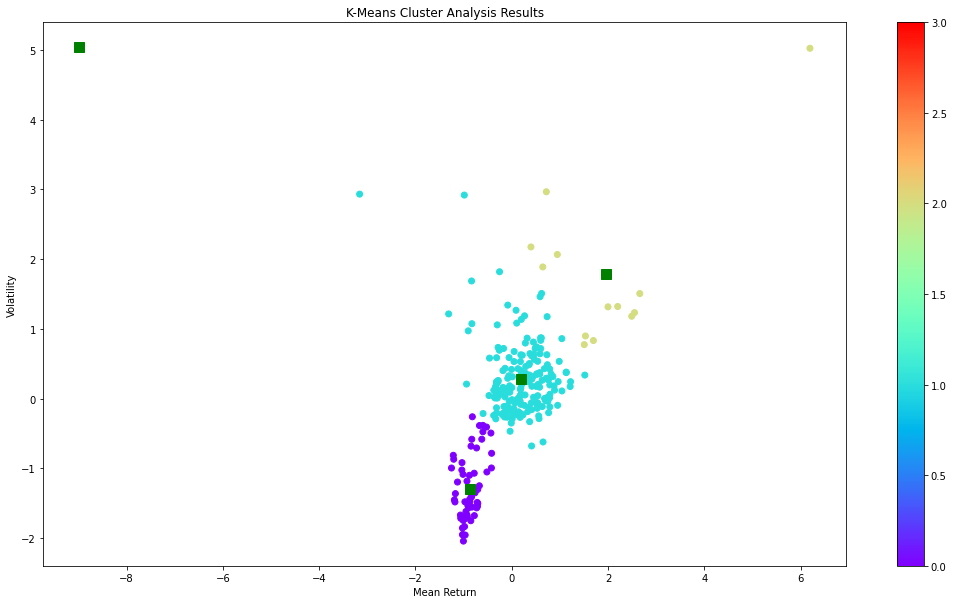

In [ ]:
# Show Results
centroids = k_means.cluster_centers_
fig = plt.figure(figsize = (18, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c=k_means.labels_, cmap="rainbow", label=X.index)
ax.set_title("K-Means Cluster Analysis Results")
ax.set_xlabel("Mean Return")
ax.set_ylabel("Volatility")
plt.colorbar(scatter)
plt.plot(centroids[:,0], centroids[:,1], "sg", markersize=10)
plt.show()

In [ ]:
# Return the series
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten())
clustered_series = clustered_series[clustered_series != -1]
clustered_series[:7]

AADR    1
AAXJ    1
ACWI    1
ACWX    1
ADRE    1
AGNG    1
AGZD    0
dtype: int32

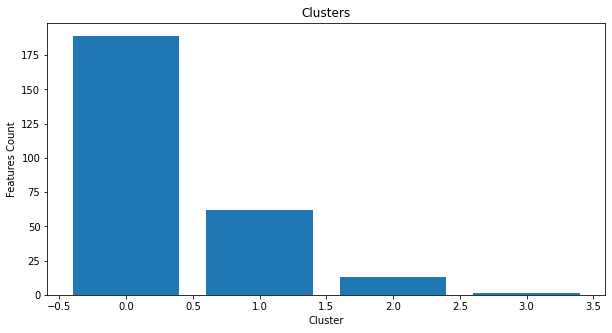

In [ ]:
# View number by cluster
plt.figure(figsize=(10, 5))
plt.bar(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Clusters")
plt.xlabel("Cluster")
plt.ylabel("Features Count")
plt.show()

In [ ]:
# Remove Items if Preferred
clusters_clean = clustered_series[clustered_series < 3]
print("Feature Number Previous: ", len(clustered_series))
print("Feature Number Current: ", len(clusters_clean))

Feature Number Previous:  265
Feature Number Current:  264


COINTEGRATION CALCULATION

In [ ]:
# Calculate cointegration
def calculate_cointegration(series_1, series_2):
    coint_flag = 0
    coint_res = coint(series_1, series_2)
    coint_t = coint_res[0]
    p_value = coint_res[1]
    critical_value = coint_res[2][1]
    model = sm.OLS(series_1, series_2).fit()
    hedge_ratio = model.params[0]
    coint_flag = 1 if p_value < 0.05 and coint_t < critical_value else 0
    return coint_flag, hedge_ratio

In [ ]:
# Loop through and calculate cointegrated pairs
# Allow 10 - 30 mins for calculation 
tested_pairs = []
cointegrated_pairs = []

if not load_coint_pairs:
    for base_asset in clusters_clean.index:
        base_label = clusters_clean[base_asset]
        
        for compare_asset in clusters_clean.index:
            compare_label = clusters_clean[compare_asset]
            
            test_pair = base_asset + compare_asset
            test_pair = ''.join(sorted(test_pair))
            is_tested = test_pair in tested_pairs
            tested_pairs.append(test_pair)
            
            if compare_asset != base_asset and base_label == compare_label and not is_tested:
                
                series_1 = data[base_asset].values.astype(float)
                series_2 = data[compare_asset].values.astype(float)
                coint_flag, _ = calculate_cointegration(series_1, series_2)
                if coint_flag == 1:
                    cointegrated_pairs.append({"base_asset": base_asset, 
                                               "compare_asset": compare_asset, 
                                               "label": base_label})
                    
    df_coint = pd.DataFrame(cointegrated_pairs).sort_values(by="label")
    df_coint.to_csv(file_name_coint)

In [ ]:
# Load Cointegrated Pairs
df_coint = pd.read_csv(file_name_coint).iloc[:, 1:]
df_coint.head()

,base_asset,compare_asset,label
0,AADR,DAX,0
1,FPXI,IBB,0
2,FNX,PSCC,0
3,FNX,INDY,0
4,FNK,VYMI,0


TSNE Plot for Visualization

Get unique list of cointegrated assets

In [ ]:
coint_assets = [df_coint["base_asset"].values]
coint_assets.append(df_coint["compare_asset"].values)
coint_unique_assets = np.unique(coint_assets)
coint_unique_assets[:5]

array(['AADR', 'AAXJ', 'ACWI', 'ACWX', 'ADRE'], dtype=object)

Get TSNE only returns and volatility

In [ ]:
df_TSNE = df_scaled.copy()
df_TSNE = df_TSNE[df_TSNE.index.isin(coint_unique_assets)]
df_TSNE.head()

,Returns,Volatility
AADR,0.014753,0.311722
AAXJ,-0.038123,0.090672
ACWI,0.332246,-0.187269
ACWX,-0.143712,-0.198211
ADRE,-0.003167,0.417291


Compute TSNE


In [ ]:
X_tsne = TSNE(learning_rate=30, perplexity=5, random_state=42, n_jobs=-1).fit_transform(df_TSNE)
X_tsne[:5]

array([[-26.246655 ,  -1.4553716],
       [-13.533588 ,  -9.65821  ],
       [  2.3019836,  33.348263 ],
       [ 14.976901 ,   9.772057 ],
       [-27.718279 ,  -0.6980286]], dtype=float32)

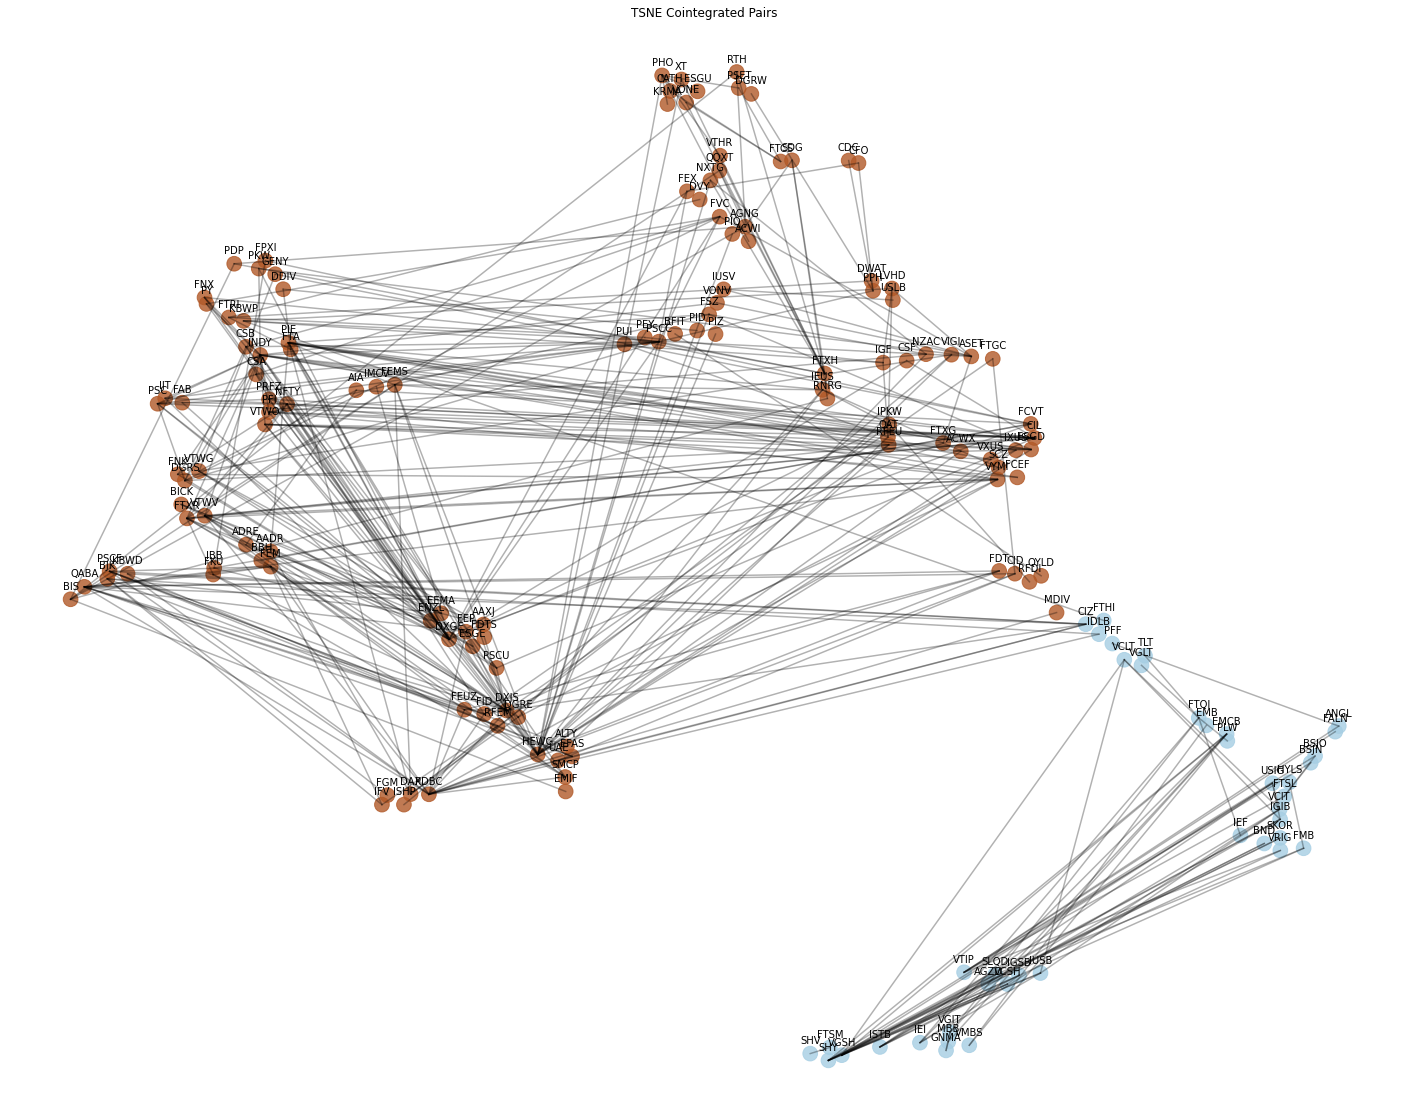

In [ ]:
in_pairs_series = clustered_series.loc[coint_unique_assets]
plt.figure(1, figsize=(25, 20))
plt.clf()
plt.axis('off')
for index, pair in df_coint.iterrows():
    ticker1 = pair[0]
    loc1 = df_TSNE.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[0]
    loc2 = df_TSNE.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3)
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Cointegrated Pairs')

# Show TSNE Plot
for x, y, name in zip(X_tsne[:, 0], X_tsne[:, 1], df_TSNE.index):
    label = name
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha="center")
plt.show()

CHECK A PAIR

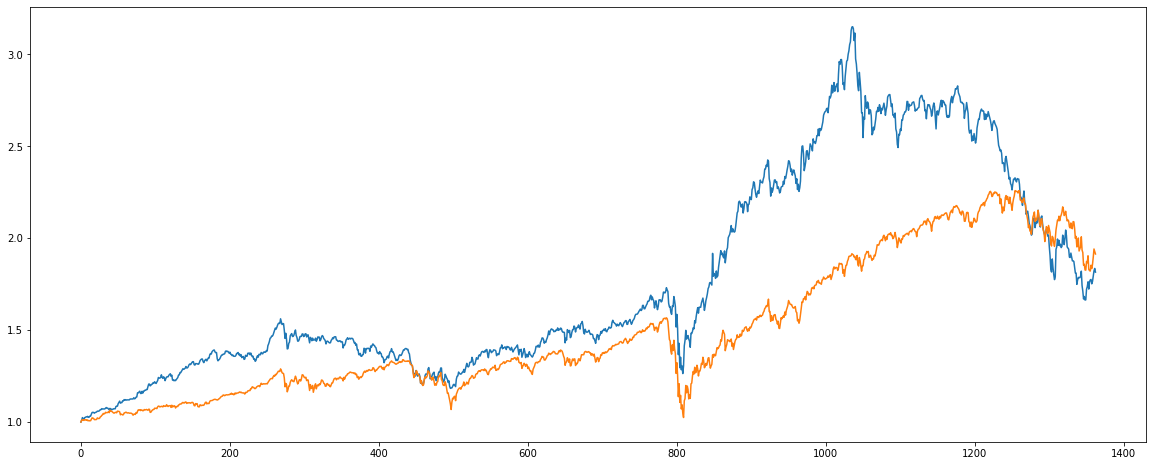

In [ ]:
# Plot price comparison for any given assets
asset_1 = "FPXI"
asset_2 = "VTHR"
asset_1_values = data[asset_1].values / data[asset_1].iloc[0].item()
asset_2_values = data[asset_2].values / data[asset_2].iloc[0].item()
plt.figure(1, figsize=(20, 8))
plt.plot(asset_1_values)
plt.plot(asset_2_values)
plt.show()

PLOT - SPREAD 

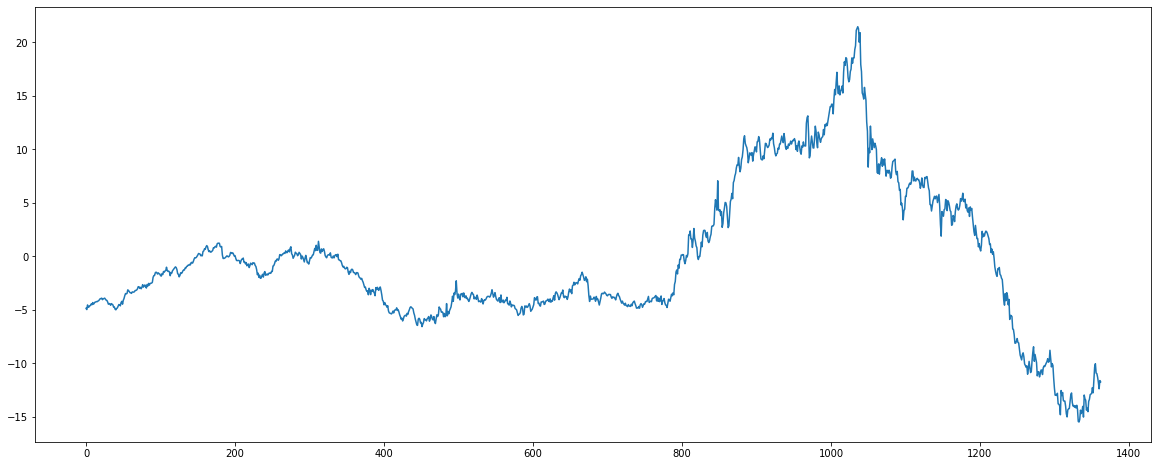

In [ ]:
# Plot the Spread
series_1 = data[asset_1].values.astype(float)
series_2 = data[asset_2].values.astype(float)
coint_flag, hedge_ratio = calculate_cointegration(series_1, series_2)
spread = series_1 - (hedge_ratio * series_2)
plt.figure(1, figsize=(20, 8))
plt.plot(spread)
plt.show()

CALCULATE THE Z-SCORE

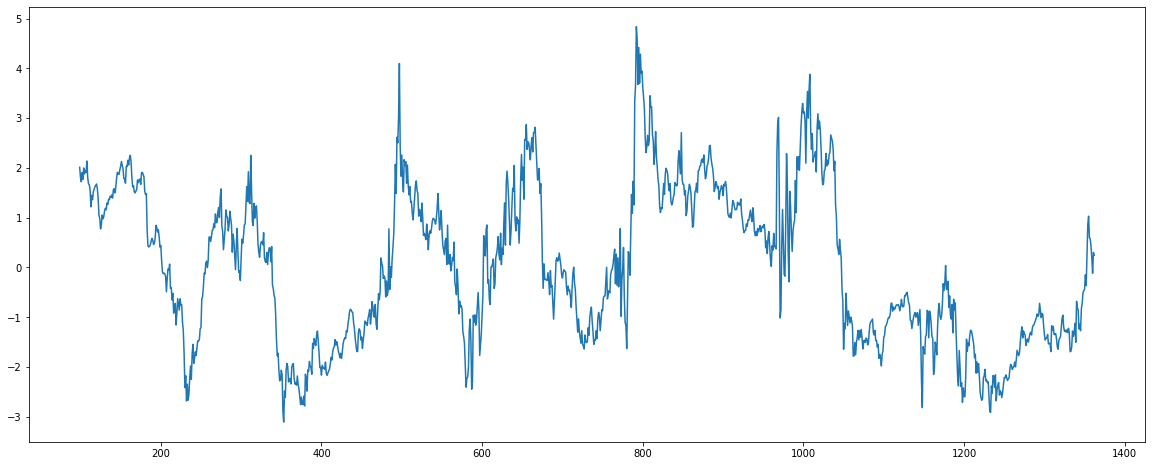

In [ ]:
# Plot the ZScore
window = 100
spread_series = pd.Series(spread)
mean = spread_series.rolling(center=False, window=window).mean()
std = spread_series.rolling(center=False, window=window).std()
x = spread_series.rolling(center=False, window=1).mean()
z_score = (x - mean) / std
plt.figure(1, figsize=(20, 8))
plt.plot(z_score)
plt.show()

**PRINCIPAL COMPONENT ANALYSIS - VIX VOLATILITY**

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from ta import add_all_ta_features

from statsmodels.tsa.stattools import adfuller
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

import matplotlib.pyplot as plt

In [ ]:
start_date = "2018-01-01"
end_date = "2023-01-01"
symbol = "^VIX"
df = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,11.07,9.52,10.95,9.77,0,9.77
2018-01-03,9.65,8.94,9.56,9.15,0,9.15
2018-01-04,9.31,8.92,9.01,9.22,0,9.22
2018-01-05,9.54,9.00,9.10,9.22,0,9.22
2018-01-08,9.89,9.32,9.61,9.52,0,9.52


In [ ]:
# Add TA
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Adj Close", volume="Volume", fillna=True)

Data Preprocessing - Stationarity

In [ ]:
# Identify non-stationary columns
non_stationaries = []
for col in df.columns:
    dftest = adfuller(df[col].values)
    p_value = dftest[1]
    t_test = dftest[0] < dftest[4]["1%"]
    if p_value > 0.05 or not t_test:
        non_stationaries.append(col)
print(f"Non-Stationary Features Found: {len(non_stationaries)}")


Non-Stationary Features Found: 20


Convert non-stationaries to stationary


In [ ]:
df_stationary = df.copy()
df_stationary[non_stationaries] = df_stationary[non_stationaries].pct_change()
df_stationary = df_stationary.iloc[1:]

In [ ]:
# Find NaN Rows
na_list = df_stationary.columns[df_stationary.isna().any().tolist()]
df_stationary.drop(columns=na_list, inplace=True)
# Handle inf values
df_stationary.replace([np.inf, -np.inf], 0, inplace=True)
df_stationary.head()

,High,Low,Open,Close,Adj Close,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,...,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,9.65,8.94,9.56,9.15,9.15,0.0,0.0,9.460000,10.080001,8.839999,...,-90.140844,0.000000,0.0,-0.508622,-0.101724,-0.406897,9.463819,-6.345965,-6.556268,-6.345965
2018-01-04,9.31,8.92,9.01,9.22,9.22,0.0,0.0,9.380000,9.934497,8.825503,...,-86.046500,0.000000,0.0,-0.847146,-0.250809,-0.596337,9.360525,0.765034,0.762123,-5.629480
2018-01-05,9.54,9.00,9.10,9.22,9.22,0.0,0.0,9.340000,9.839801,8.840200,...,-86.046500,0.000000,0.0,-1.105125,-0.421672,-0.683453,9.312689,0.000000,0.000000,-5.629480
2018-01-08,9.89,9.32,9.61,9.52,9.52,0.0,0.0,9.376000,9.845656,8.906345,...,-72.093001,0.000000,0.0,-1.045394,-0.546416,-0.498978,9.399234,3.253798,3.201983,-2.558854
2018-01-09,10.09,9.37,9.41,10.08,10.08,0.0,0.0,9.493333,10.170944,8.815723,...,-46.046509,-0.148667,0.0,-0.520761,-0.541285,0.020524,9.603357,5.882347,5.715836,3.172973


SCALING AND TARGET SCALING

In [ ]:
# Set Target (for Supervised ML later on)
df_stationary["TARGET"] = -1
df_stationary.loc[df_stationary["Adj Close"].shift(-1) > df_stationary["Adj Close"], "TARGET"] = 1
df_stationary.dropna(inplace=True)

# Split Target from Featureset
X = df_stationary.iloc[:, :-1]
y = df_stationary.iloc[:, -1]

# Feature Scaling
df_sc = df_stationary.copy()
X_fs = StandardScaler().fit_transform(X)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.7, random_state=42)

PCA Dimensionality Reduction

In [ ]:
n_components = 8
pca = PCA(n_components=n_components)
pca_result = pca.fit(X_train)
X_train_pca = pca_result.transform(X_train)
X_test_pca = pca_result.transform(X_test)

Calculate the variance explained by Principle Components


In [ ]:
print("Variance of each component: ", pca.explained_variance_ratio_)
print("\n Total Variance Explained: ", round(sum(list(pca.explained_variance_ratio_)) * 100, 2))

Variance of each component:  [0.33444448 0.26860024 0.0842983  0.04396543 0.03654398 0.03332053
 0.02473004 0.01910384]

 Total Variance Explained:  84.5


In [ ]:
# Create columns
pca_cols = []
for i in range(n_components):
    pca_cols.append(f"PC_{i}")
pca_cols

df_pca = pd.DataFrame(data=X_train_pca, columns=pca_cols)
df_pca.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-3.356389,-4.351668,0.119003,-0.882571,0.099217,-1.046926,1.052482,-0.673955
1,-3.887689,-4.159058,-0.449699,0.139157,-0.020235,0.023445,1.169520,0.391641
2,0.270173,-0.264025,2.856690,0.397726,0.080038,0.643673,0.645624,-0.932029
3,-0.694115,-3.128338,3.075461,2.682822,-1.567481,-2.552437,-0.837993,0.843915
4,-1.298142,0.103724,4.172564,-0.739835,-0.927456,1.539613,-1.007678,-0.456297


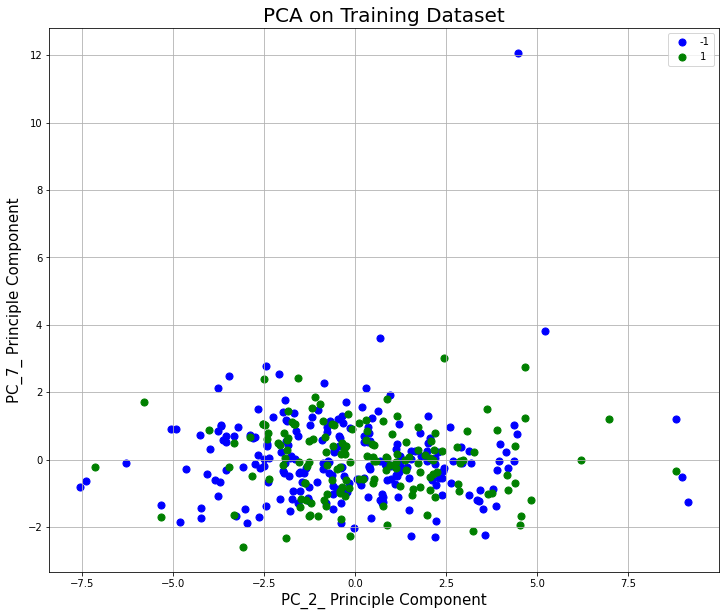

In [ ]:
# Visualize Principle Components with Scatter Plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1,1)
col_1 = "PC_2"
col_2 = "PC_7"
ax.set_xlabel(f"{col_1}_ Principle Component", fontsize=15)
ax.set_ylabel(f"{col_2}_ Principle Component", fontsize=15)
ax.set_title("PCA on Training Dataset", fontsize=20)

targets = [-1, 1]
colors = ['b', 'g']
for target, color in zip(targets, colors):
    indices_to_keep = y_train == target
    indices_to_keep = list(indices_to_keep)
    ax.scatter(df_pca.loc[indices_to_keep, col_1],
               df_pca.loc[indices_to_keep, col_2],
               c = color,
               s=50)
ax.legend(targets)
ax.grid()

**Supervised ML - Random Forest Classification**

In [ ]:
classifier = RandomForestClassifier(n_estimators=12, max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=12, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print(f"Test Precision: {precision}")

Test Accuracy: 0.5482406356413166
Test Precision: 0.49707602339181284


In [ ]:
y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[0.74747683, 0.25252317],
       [0.51813343, 0.48186657],
       [0.57797246, 0.42202754],
       ...,
       [0.48070893, 0.51929107],
       [0.56852878, 0.43147122],
       [0.63366644, 0.36633356]])

Test for Overfitting

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 200)]
for i in values:
    classifier = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    classifier.fit(X_train, y_train)
    
    # Training Data
    y_train_pred = classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    train_scores.append(accuracy_train)
    
    # Test Data
    y_test_pred = classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    test_scores.append(accuracy_test)

PCA - RANDOM FOREST CLASSIFIER - VISUALISATION

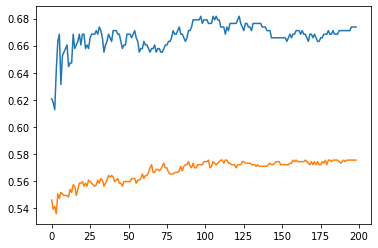

In [ ]:
plt.plot(train_scores)
plt.plot(test_scores)
plt.show()